In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/audi-used-car-listings/audi.csv


# Import Helpful Libraries

In [2]:
# Libraries for statistics, DataSet and data processing
import numpy as np
import pandas as pd

# Libraries for ploting
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [3]:
audi = pd.read_csv("/kaggle/input/audi-used-car-listings/audi.csv")
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


# Analysis Data

In [4]:
audi.shape

(10668, 9)

In [5]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [8]:
categorical = audi.select_dtypes(['category', 'object']).columns

for col in categorical:
    print('{} : {} unique value(s)'.format(col, audi[col].nunique()))
    
print('\n-------------\n')

for col in categorical:
    print('{} : {}'.format(col, ', '.join(audi[col].unique())))

model : 26 unique value(s)
transmission : 3 unique value(s)
fuelType : 3 unique value(s)

-------------

model :  A1,  A6,  A4,  A3,  Q3,  Q5,  A5,  S4,  Q2,  A7,  TT,  Q7,  RS6,  RS3,  A8,  Q8,  RS4,  RS5,  R8,  SQ5,  S8,  SQ7,  S3,  S5,  A2,  RS7
transmission : Manual, Automatic, Semi-Auto
fuelType : Petrol, Diesel, Hybrid


# Exploratory Data Analysis (EDA)

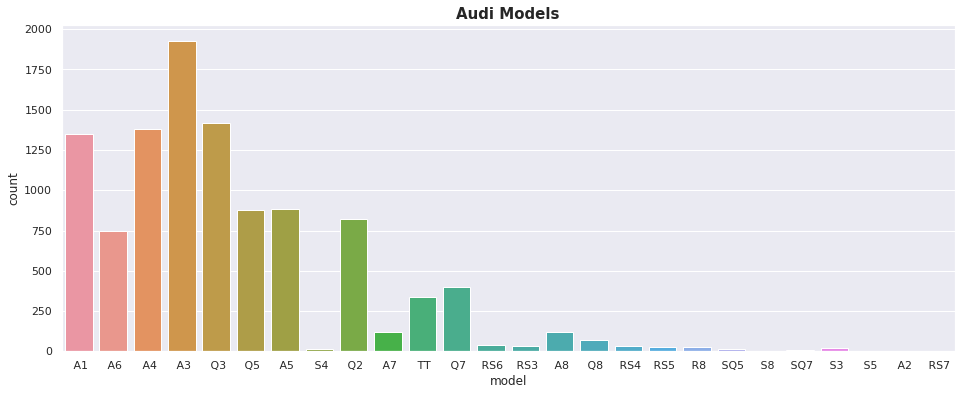

In [9]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(16,6))
sns.countplot(data=audi, x='model')
plt.title('Audi Models', fontsize=15, fontweight='bold')
plt.show()

**Audi dataset have 26 different models. And here its counts, most sale car is A3**

<AxesSubplot:xlabel='fuelType', ylabel='count'>

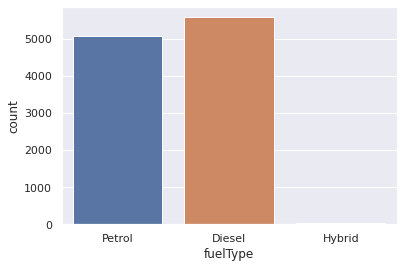

In [10]:
sns.countplot(data=audi, x='fuelType')

**Audi Car have 3 Fuel Type Petrol, Diesel and Hybrid electric**

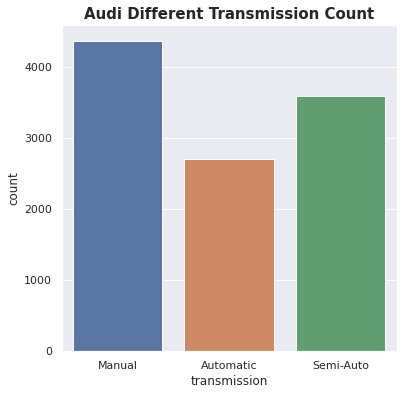

In [11]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,6))
sns.countplot(data=audi, x='transmission')
plt.title('Audi Different Transmission Count', fontsize=15, fontweight='bold')
plt.show()

**3 Differenet Types of Transmission Engines**

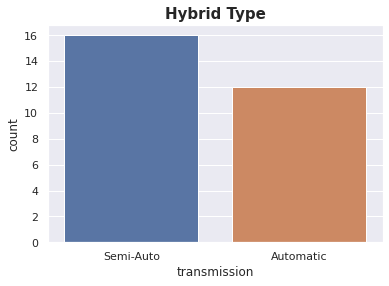

In [12]:
h = audi.loc[audi['fuelType'] == 'Hybrid']
sns.countplot(data=h, x='transmission')
plt.title('Hybrid Type', fontsize=15, fontweight='bold')
plt.show()

**In Audi Cars only Semi-Auto and Automatic have Hybrid Fuel Type**

In [13]:
px.histogram(audi, x='transmission', 
             title='Transmission vs. FuelType', 
             color='fuelType')

* **Manual car have only Petrol and Diesel fuel, Almost Both have same counts**
* **Automatic have all 3 types, but Diesel is more in counts and hybrid is very less in numbers**
* **Semi-Auto have all 3 types, but Hybrid is increasing its number now**

<AxesSubplot:xlabel='year', ylabel='count'>

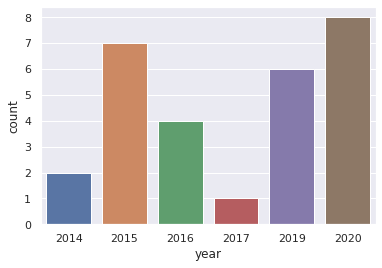

In [14]:
h = audi.loc[audi['fuelType'] == 'Hybrid']
sns.countplot(data=h, x='year')

<AxesSubplot:xlabel='year', ylabel='count'>

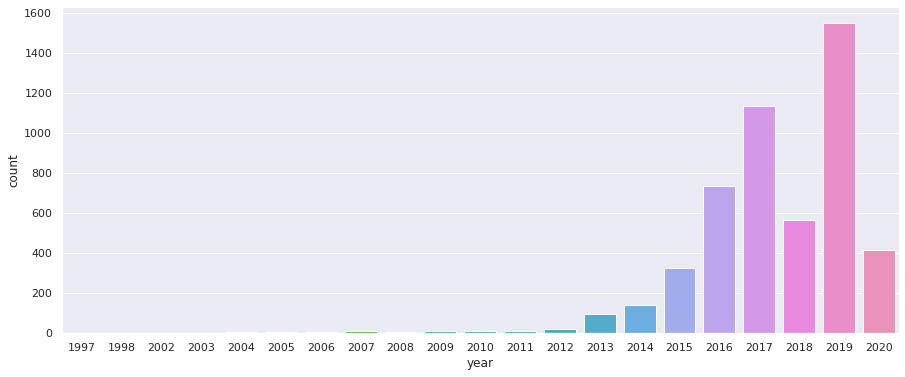

In [15]:
plt.figure(figsize=(15, 6))
h = audi.loc[audi['fuelType'] == 'Petrol']
sns.countplot(data=h, x='year')

In [16]:
# Grouped Transmission and Fuel Type with Model
df = audi.groupby(['model','year', 'transmission'])['fuelType'].value_counts().to_frame(name = 'count').reset_index()
df

,model,year,transmission,fuelType,count
0,A1,2010,Automatic,Petrol,1
1,A1,2011,Manual,Petrol,3
2,A1,2011,Manual,Diesel,2
3,A1,2012,Automatic,Petrol,2
4,A1,2012,Manual,Diesel,12
...,...,...,...,...,...
632,TT,2019,Manual,Petrol,9
633,TT,2019,Semi-Auto,Petrol,32
634,TT,2020,Automatic,Petrol,8
635,TT,2020,Manual,Petrol,1


In [17]:
px.histogram(df, x='model', 
             title='model and its transmission', 
             color='transmission')

**The best car of audi is A3, who sale is around 80 cars**

In [18]:
px.histogram(df, x='model', 
             title='model and its Fuel Type', 
             color='fuelType')

**Audi Make more number of Diesel car as compare to petrol and hybrid**

<AxesSubplot:xlabel='year', ylabel='price'>

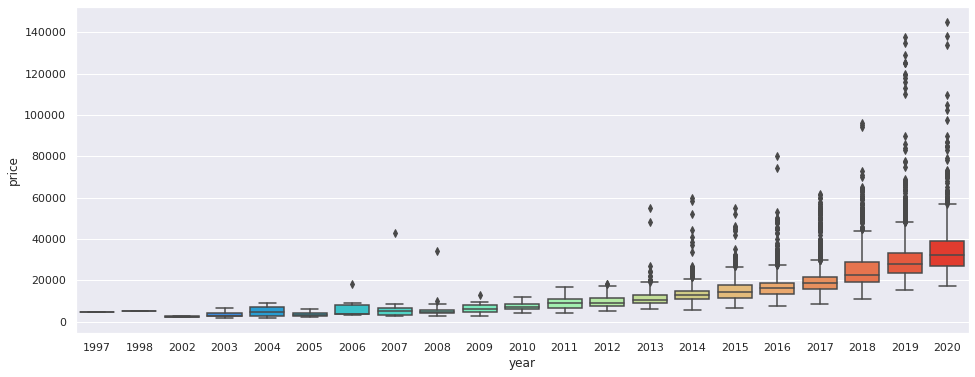

In [19]:
plt.figure(figsize=(16,6))
sns.boxplot(x="year", y="price", data=audi, palette='rainbow')

**Year and Price have many outliers which we have to Solve**

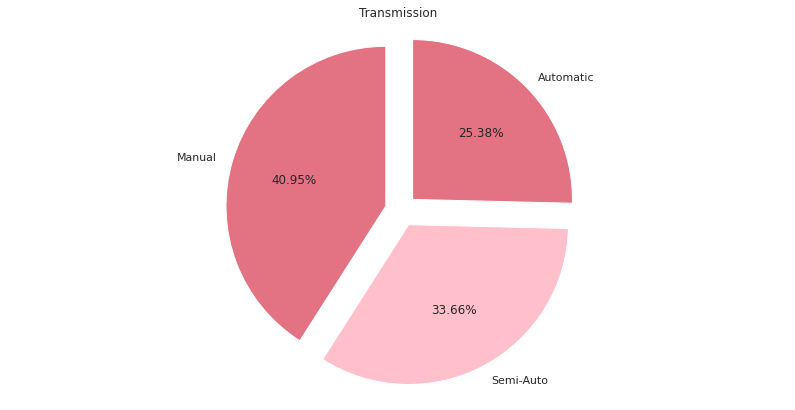

In [20]:
plt.figure(figsize=(14, 7))
labels=['Manual','Semi-Auto','Automatic']
plt.pie(audi['transmission'].value_counts(),labels=labels,explode=[0.1,0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Transmission')
plt.axis('equal')
plt.show()

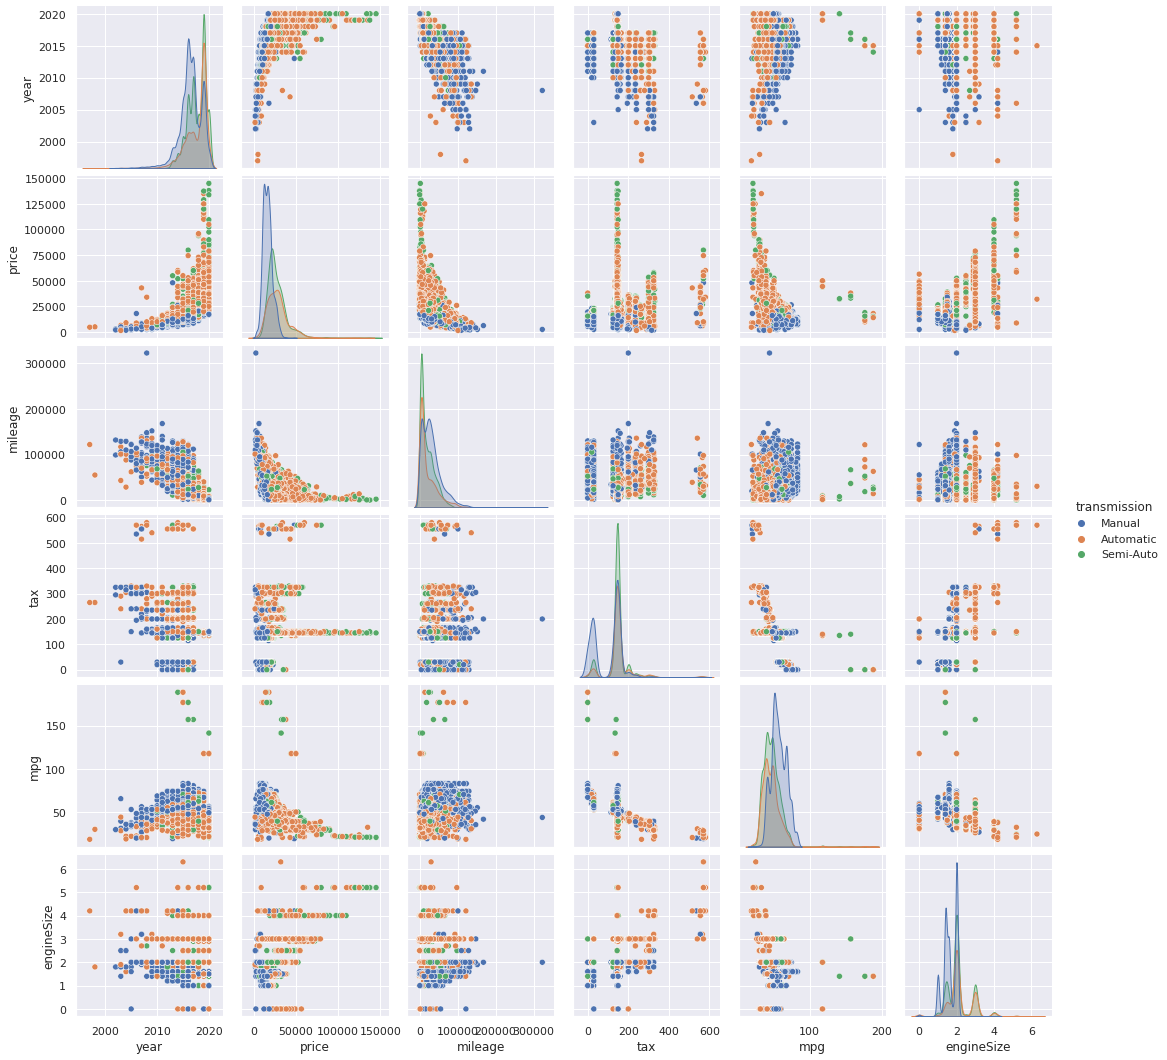

In [21]:
sns.pairplot(data=audi, hue='transmission')

<AxesSubplot:xlabel='year', ylabel='price'>

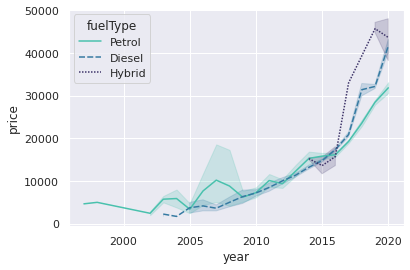

In [22]:
palette = sns.color_palette("mako_r", 3)
sns.lineplot(data=audi, x="year", y="price", hue='fuelType', style="fuelType", palette=palette)

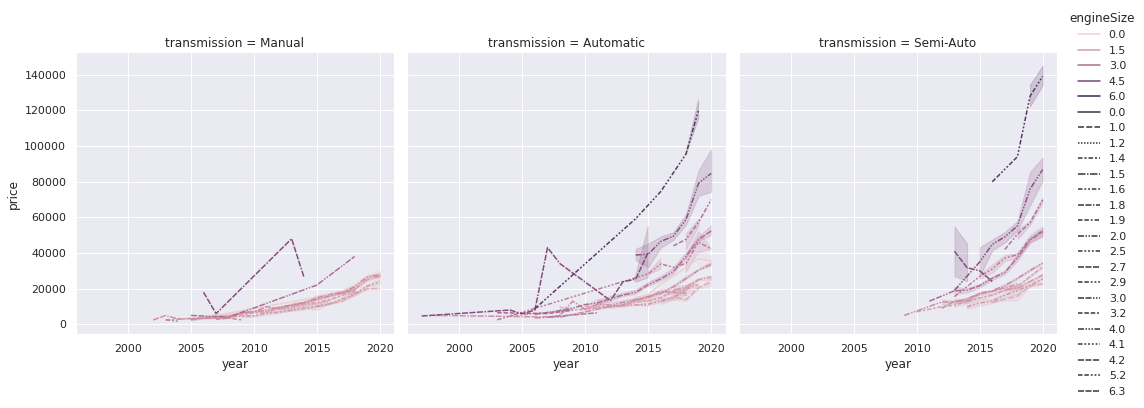

In [23]:
sns.relplot(
    data=audi, x="year", y="price",
    col="transmission", hue="engineSize", style="engineSize",
    kind="line"
)

In [24]:
px.scatter(audi, 
           title='Engine Vs Fuel Type',
           x='mpg', 
           y='engineSize', 
           color='fuelType')

**Analysis is Almost Complete. I will apply now this data in machine learning algorithms too predict future price of Audi Cars in next notebook. If you like my work please upvote and feel free too comment my mistakes. Thank you**